In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Let's import the data.

In [2]:
path = os.path.join(os.getcwd(), 'data', 'ex2data1.txt')

In [5]:
data = pd.read_csv(path, header=None, names=['Exam 1 Score', 'Exam 2 Score', 'Admitted'])

In [6]:
data.head()

,Exam 1 Score,Exam 2 Score,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [7]:
data.describe()

,Exam 1 Score,Exam 2 Score,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [9]:
data.head()[data['Admitted'].isin([1])]

C:\Python35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Exam 1 Score,Exam 2 Score,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [10]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

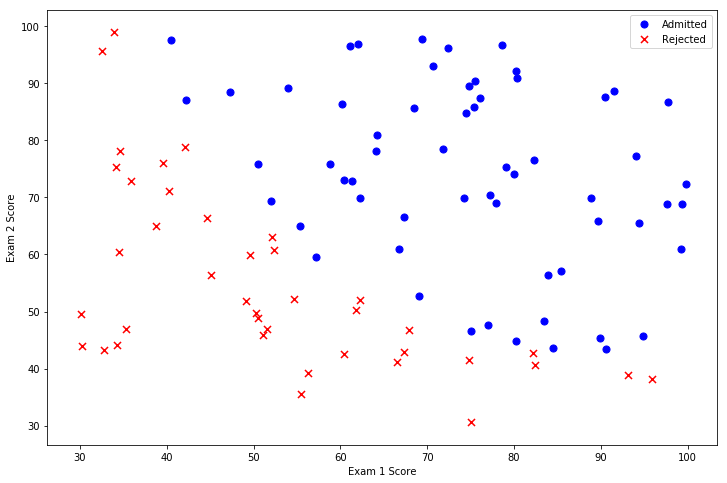

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1 Score'], positive['Exam 2 Score'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1 Score'], negative['Exam 2 Score'], s=50, c='r', marker='x', label='Rejected')

ax.legend()

ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

Now we write the sigmoid function $ \sigma(z) = \dfrac{1}{1 + e^{-z}} $

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Now we implement the cost function for Logistic Regression. Recall: $$ J(\theta) = \dfrac{1}{m}\sum_{i=1}^m \left[ -y^{(i)}\log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})\log(1 - h_{\theta}(x^{(i)})) \right] $$ and $$ \dfrac{\partial J(\theta)}{\partial \theta_j} = \dfrac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} $$, while our hypothesis is $$ h_{\theta}(x) = \dfrac{1}{1 + e^{-\theta^T x}} $$

Let's also plot the sigmoid function.

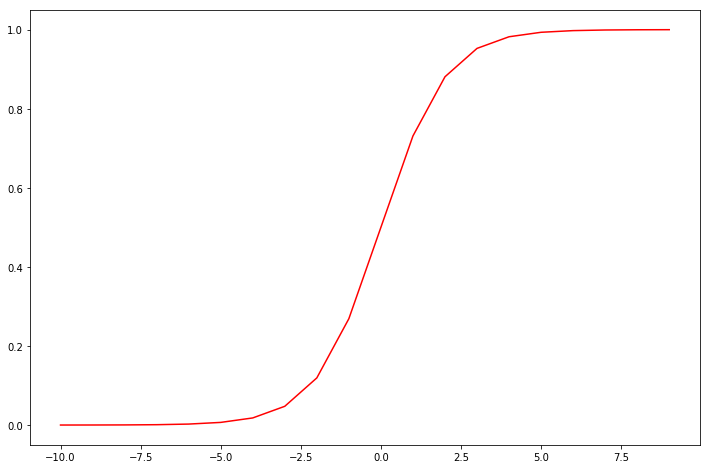

In [14]:
nums = np.arange(-10,10,step=1)

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums),'r')

In [35]:
def cost(theta, X, y, debug=False):
    """
    Implement cost function for Logistic Regression.
    """
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    if debug:
        print("X shape: " + str(X.shape))
        print("y shape: " + str(y.shape))
        print("theta shape: " + str(theta.shape))
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply(1 - y, np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [16]:
# now we need to add a Ones column
data.insert(0,'Ones',1)

In [17]:
data.head()

,Ones,Exam 1 Score,Exam 2 Score,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [18]:
# we want to set the training data as X and y as the target var: Admitted
cols = data.shape[1]
X = data.iloc[ : , 0 : cols-1 ]
y = data.iloc[ : , cols-1 : cols ]

In [19]:
X.head()

,Ones,Exam 1 Score,Exam 2 Score
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376


In [20]:
y.head()

,Admitted
0,0
1,0
2,0
3,1
4,1


In [21]:
# make arrays
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [22]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

In [23]:
cost(X,y,theta) # initial cost

0.69314718055994529

In [36]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    params = int(theta.ravel().shape[1]) # gives length of theta / parameters (3)
    grad = np.zeros(params)
    error = sigmoid(X * theta.T) - y
    
    for i in range(params):
        term = np.multiply(error, X[ : , i ]) # X[:,j] is the x_j term we have to multiply the error by in the gradient
        grad[i] = (1 / len(X)) * np.sum(term)
        
    return grad

In [29]:
np.log(sigmoid(X * theta.T)).shape

(100, 3)

In [30]:
val = np.multiply(-y, np.log(sigmoid(X * theta.T)))

In [32]:
val.shape

(100, 3)

In [37]:
# we can use an Octave fxn to optimize params
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X,y))
cost(result[0], X, y)

0.20349770158947419

Now recall that if we want to predict on a new example $x$, we output $ h_{\theta}(x) = \dfrac{1}{1 +  e^{-\theta^T x}} $

In [41]:
def predict(theta, X):
    result_prob = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in result_prob]

In [43]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)

correct = [1 if (a == 1 and b == 1) or (a == 0 and b == 0) else 0 for (a,b) in zip(predictions, y)]
accuracy = sum(map(int,correct)) % len(correct)

print('accuracy is {0}%'.format(accuracy))

accuracy is 89%


## Regularized Logistic Regression

In [44]:
path = os.path.join(os.getcwd(), 'data', 'ex2data2.txt')
data2 = pd.read_csv(path, header=None, names=['Microchip Test 1', 'Microchip Test 2', 'Accepted'])

In [45]:
data2.head()

,Microchip Test 1,Microchip Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [46]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

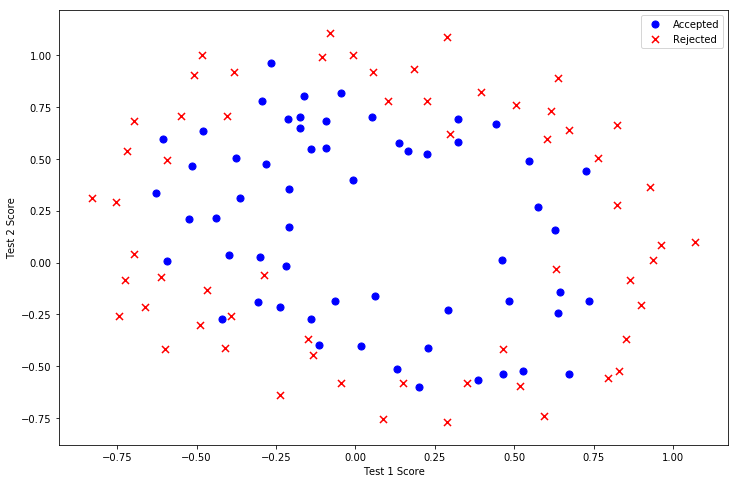

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Microchip Test 1'], positive['Microchip Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Microchip Test 1'], negative['Microchip Test 2'], s=50, c='r', marker='x', label='Rejected')

ax.legend()

ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [48]:
degree = 5
x1 = data2['Microchip Test 1']
x2 = data2['Microchip Test 2']

In [49]:
data2.insert(3,'Ones',1)

In [50]:
# now let's do the feature mapping
for i in range(1,degree):
    for j in range(0,i):
        data2['F' + str(i) + str(j)] = np.power(x1,i) * np.power(x2,j) # this is multiplying x1^i times x2^(6 - i)

In [51]:
data2.drop('Microchip Test 1', axis=1, inplace=True)
data2.drop('Microchip Test 2', axis=1, inplace=True)

In [52]:
data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.001839,0.000135,0.000094,0.000066,0.000007,0.000005,0.000003,0.000002
1,1,1,-0.092742,0.008601,0.005891,-0.000798,-0.000546,-0.000374,0.000074,0.000051,0.000035,0.000024
2,1,1,-0.213710,0.045672,0.031616,-0.009761,-0.006757,-0.004677,0.002086,0.001444,0.001000,0.000692
3,1,1,-0.375000,0.140625,0.070620,-0.052734,-0.026483,-0.013299,0.019775,0.009931,0.004987,0.002505
4,1,1,-0.513250,0.263426,0.122661,-0.135203,-0.062956,-0.029315,0.069393,0.032312,0.015046,0.007006


Now let's do the regularized cost function.

In [ ]:
def costReg(theta, X, y, learningRate):
    